# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maya Myerella
- **Email:** maya.myerella.2103126@students.um.ac.id
- **ID Dicoding:** https://www.dicoding.com/users/maya_myerella/academies

## Menentukan Pertanyaan Bisnis

1. Bagaimana cuaca memengaruhi penggunaan sepeda?
2. Apakah terdapat perbedaan signifikan dalam penggunaan sepeda antara holiday, weekday dan workingday?
3. Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?
4. Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?
5. Bagaimana tren penggunaan sepeda dalam setahun?

## Import Semua Packages/Library yang Digunakan

Berikut merupakan library yang digunakan untuk analisis proyek data.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Data Type

In [9]:
print('Dataframe day:')
print(day_df.info())

print('\nDataframe hour:')
print(hour_df.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

#### Missing Value

In [12]:
print('\nTampilkan data Null Day:', day_df.isna().sum())
print('\nTampilkan data Null Hour:', hour_df.isna().sum())


Tampilkan data Null Day: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tampilkan data Null Hour: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari analisis data diatas, dapat disimpulkan tidak ada data yang hilang

#### Duplicate Data

In [13]:
print("Info data duplikat Day:", day_df.duplicated().sum())
print("Info data duplikat Hour:", hour_df.duplicated().sum())

Info data duplikat Day: 0
Info data duplikat Hour: 0


Dihasilkan bahwa pada dataset ini, tidak ada data yang sama atau terduplikat

#### Descriptive Statistic

In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Descriptive Analysis

Dataset day

1. Jumlah data: 731 entri.
2. Musim paling umum: Musim panas (season 2).
3. Tahun yang dominan: 2012 (yr = 1).
4. Bulan yang paling sering muncul: Juli (mnth 7).
5. Hari libur hanya ada sekitar 2.87% dari total hari.
6. Hari kerja adalah mayoritas (sekitar 68.40%).
7. Cuaca rata-rata pada keadaan yang baik (weathersit 1).
8. Suhu rata-rata adalah sekitar 0.50 (41°C), dengan suhu perasaan rata-rata sekitar 0.47 (50°C).
9. Kelembaban rata-rata sekitar 0.47 (47%).
10. Kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal).
11. Jumlah pengguna casual rata-rata sekitar 848.
12. Jumlah pengguna terdaftar rata-rata sekitar 3656.
13. Total rental rata-rata sekitar 4504 per hari.

In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataset hour

1. Dataset terdiri dari 17,379 entri.
2. Rata-rata kolom-kolom utama adalah sekitar:
   - Musim (season) 2.50, menunjukkan musim rata-rata.
   - Tahun (yr) 0.50, mengindikasikan perbandingan antara tahun 2011 dan 2012.
   - Bulan (mnth) 6.54, menunjukkan bulan rata-rata dalam setahun.
   - Jam (hr) 11.55, mengindikasikan jam rata-rata dalam sehari.
   - Hari libur (holiday) 0.03, persentase hari libur.
   - Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
   - Hari kerja (workingday) 0.68, persentase hari kerja.
   - Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
   - Suhu (temp) 0.50, suhu rata-rata yang normal.
   - Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
   - Kelembaban (hum) 0.48, kelembaban rata-rata.
   - Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
   - Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
   - Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
   - Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

### Cleaning Data

In [17]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Mengubah nama judul kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'hr': 'hour',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [21]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# Mengubah angka menjadi keterangan
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [23]:
# Mengubah tipe data ke datetime
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [25]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [33]:
# Mengelompokkan penyewa sepeda berdasarkan bulan
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

In [34]:
# Mengelompokkan penyewa berdasarkan cuaca
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

In [35]:
# Mengelompokkan penyewa sepeda berdasarkan holiday
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

In [36]:
# Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan sesason
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

### Explore Data hour_df

In [37]:
# Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan jam
hour_df.groupby(by='hour').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual  registered count                
           mean        mean   max min        mean
hour                                             
0     10.158402   43.739669   283   2   53.898072
1      6.504144   26.871547   168   1   33.375691
2      4.772028   18.097902   132   1   22.869930
3      2.715925    9.011478    79   1   11.727403
4      1.253945    5.098996    28   1    6.352941
5      1.411437   18.478382    66   1   19.889819
6      4.161379   71.882759   213   1   76.044138
7     11.055021  201.009629   596   1  212.064649
8     21.679505  337.331499   839   5  359.011004
9     30.891334  188.418157   426  14  219.309491
10    46.477304  127.191197   539   8  173.668501
11    59.540578  148.602476   663  10  208.143054
12    68.293956  185.021978   776   3  253.315934
13    72.308642  181.352538   760  11  253.661180
14    75.567901  165.381344   750  12  240.949246
15    74.905350  176.327846   750   7  251.233196
16    73.745205  238.238356   783  11  311.983562
17    74.273973  387.178082   976  15  461.452055
18    61.120879  364.390110   977  23  425.510989
19    48.770604  262.752747   743  11  311.523352
20    36.233516  189.796703   567  11  226.030220
21    28.255495  144.059066   584   6  172.314560
22    22.252747  109.082418   502   9  131.335165
23    15.199176   72.631868   256   2   87.831044

Berdasarkan hasil analisis diatas, dapat disimpulkan bahwa rata-rata penyewa casual suka menyewa pada kisaran jam 14.00, sedangkan untuk penyewa registered adalah kisaran jam 17.00. Untuk jam dengan penyewa paling sedikit baik penyewa casual dan registered adalah jam 4.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca memengaruhi penggunaan sepeda?

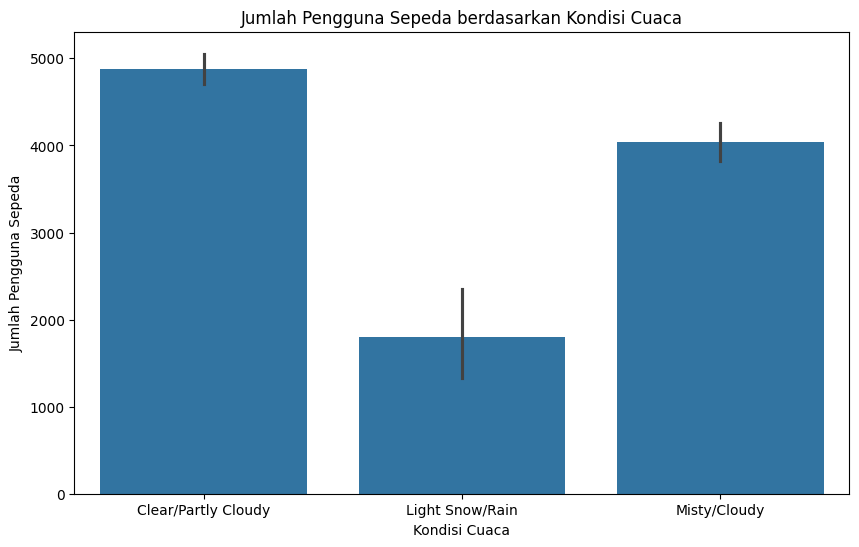

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam penggunaan sepeda antara holiday, weekday dan workingday?

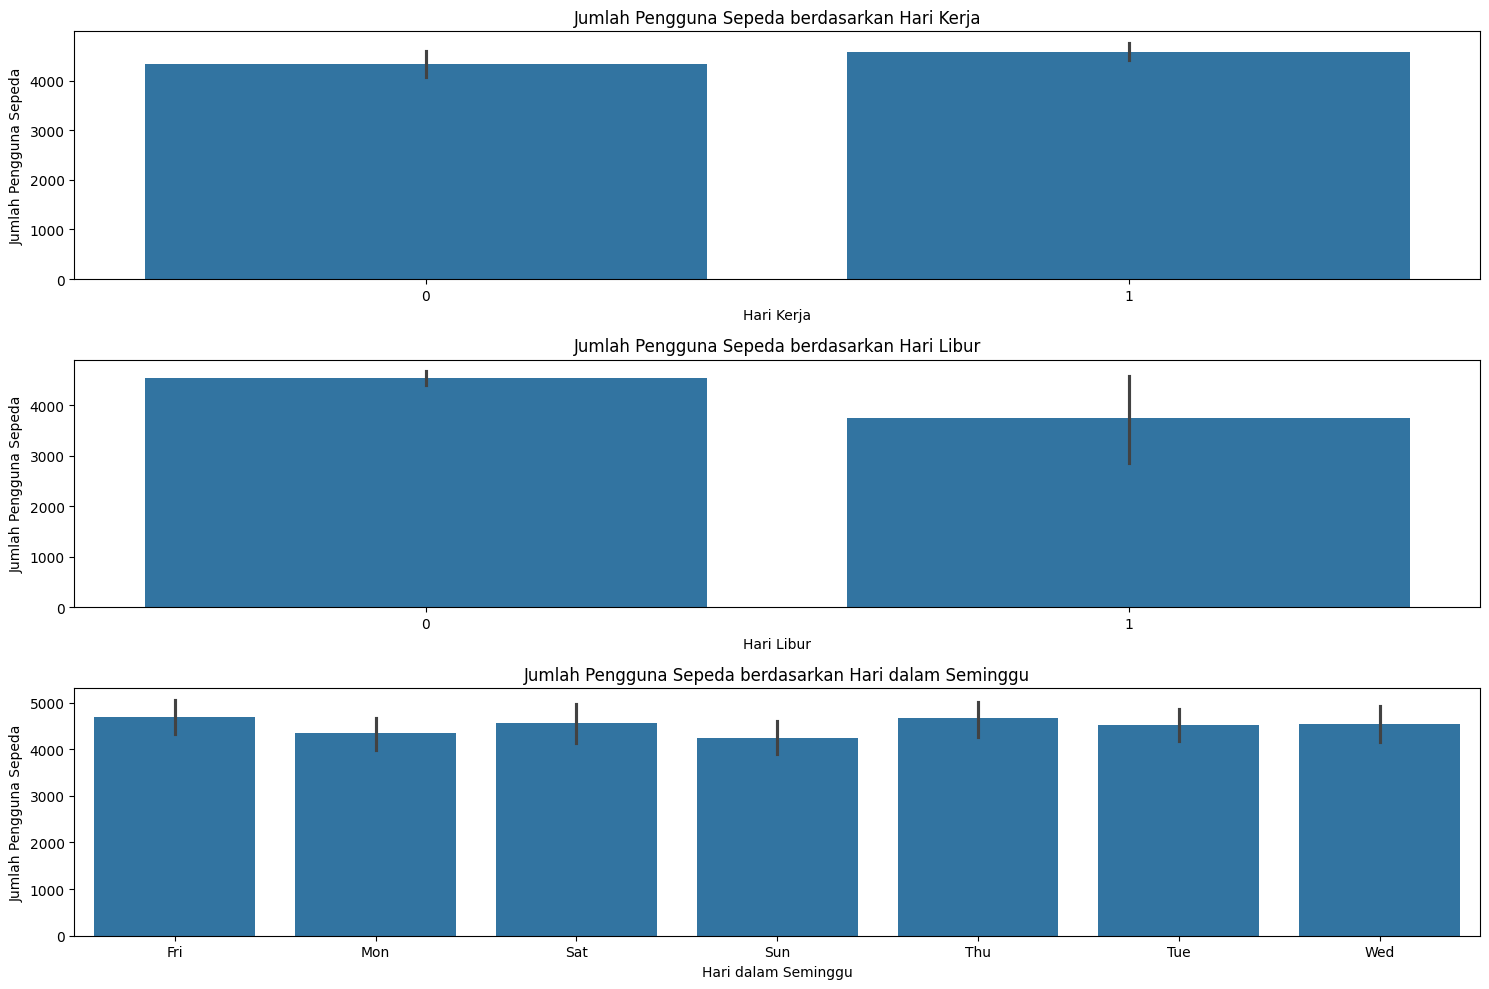

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas menggunakan barplot, didapat pernyataan sebagai berikut:

- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir pekan (yakni sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
- Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 3: Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?

In [40]:
# Filter tahun 2011, musim panas (season 2), dan hari libur (holiday = 1)
filtered_data = day_df[(day_df["year"] == 0) & (day_df["season"] == 2) & (day_df["holiday"] == 1)]

# Hitung jumlah total sepeda sewaan
total_sepeda_sewaan = filtered_data["count"].sum()

print("Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011:", total_sepeda_sewaan)

Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011: 0


### Pertanyaan 4: Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

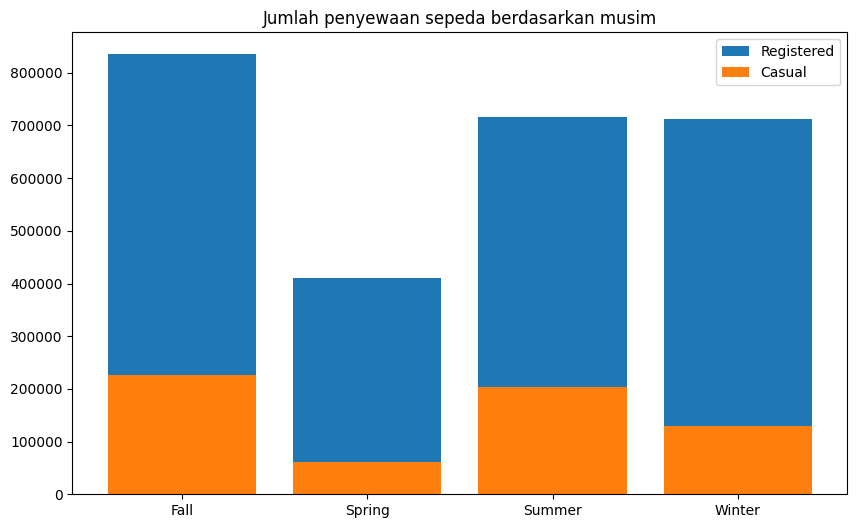

In [41]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).

### Pertanyaan 5: Bagaimana tren penggunaan sepeda dalam setahun?

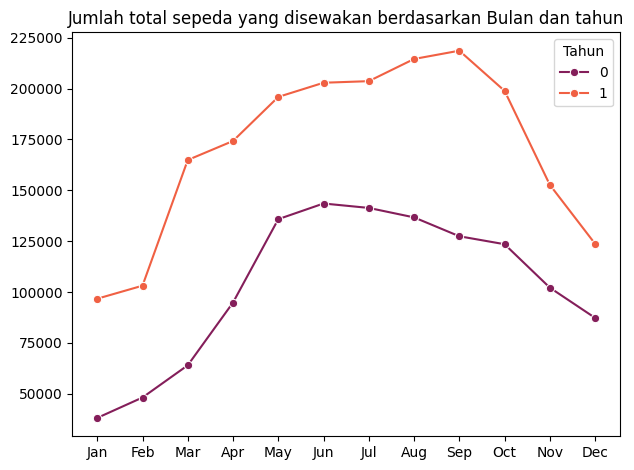

In [42]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data tersebut dapat disimpulkan bahwa tren penyewaan/rental sepeda berada di puncak pada bulan September tahun kedua. Sepanjang tahun tren tersebut naik turun.

## Conclusion

- Conclution pertanyaan 1 : Tingkat penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca. Ketika cuaca cerah atau sedikit mendung, sepeda menjadi cukup diminati oleh sejumlah penyewa. Sebaliknya, situasinya berbeda ketika cuaca sedang hujan. Dengan melihat boxplot, terlihat bahwa pada kondisi cuaca yang kurang menguntungkan, penyewaan sepeda memiliki sedikit peminat.
- Conclution pertanyaan 2 : Pada analisis tersebut menggambarkan bahwa kegiatan penyewaan sepeda cenderung lebih tinggi selama hari kerja dan lebih rendah pada akhir pekan. Selain itu, perbedaan signifikan terlihat antara hari biasa dan hari libur, dengan kecenderungan lebih banyak orang menyewa sepeda pada hari biasa. Hari Jumat secara khusus menonjol sebagai hari dengan jumlah penyewa sepeda tertinggi, sementara Hari Minggu memiliki tingkat peminat yang lebih rendah.
- Conclution pertanyaan 3 : Pada hari natal ditahun 2012, distribusi penyewaan sepeda tidak terjadi sama sekali. Hal ini bisa disebabkan oleh beberapa hal misalnya adalah penyewa lebih memilih untuk melakukan liburan pribadi ataupun kegiatan lain.
- Conclution pertanyaan 4 : Dalam visualisasi terakhir, terdapat hasil yang mengejutkan dimana musim dingin (Winter) bukanlah musim yang terakhir, melainkan musim semi (Spring). Fenomena ini dapat dipengaruhi oleh sejumlah faktor, termasuk kondisi cuaca, suhu udara, hari kerja, hari libur, dan berbagai pertimbangan lainnya. Sebaliknya, musim yang paling diminati dalam hal penyewaan sepeda adalah musim gugur (Fall), yang berhasil mencapai lebih dari 800,000 penyewaan, menempatkannya sebagai musim dengan tingkat peminat tertinggi.
- Conclution pertanyaan 5 : Berdasarkan visualisasi data, dapat disimpulkan bahwa tren penyewaan atau rental sepeda mencapai puncaknya pada bulan September tahun kedua dalam rentang waktu yang dianalisis. Selama periode tersebut, terjadi fluktuasi atau perubahan dalam tren penyewaan sepeda sepanjang tahun, menunjukkan adanya variasi dalam tingkat peminat sepeda dari waktu ke waktu.